https://plot.ly/python/reference/#layout-updatemenus

In [1]:
import ANEMO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

config = {'showLink':False,
          'displaylogo':False,
          'modeBarButtonsToRemove':['zoom2d', 'pan2d', 'toImage',
                                    'toggleSpikelines','hoverClosestCartesian',
                                    'hoverCompareCartesian', 'sendDataToCloud']}

# Model SmoothPursuit

In [3]:
time = np.arange(1200)
SOff = 200 # StimulusOff
TOn = SOff+300 # TargetOn

In [4]:
x=np.arange(len(time))

dir_target, start_anti, latency, a_anti, tau, steady_state = 1, TOn-100, TOn+75, -10, 15, 15
ramp_pursuit_sigmo, ramp_pursuit_line = 100, 40

dict_list = {
    'dir_target': [-1,1],
    # step 1
    'a_anti': np.linspace(-40, 40, 5),
    'latency': np.linspace(TOn+75, 1200, 5),
    'steady_state': np.linspace(5, 40, 5),
    # step 2
    'start_anti' : np.linspace(SOff-200, TOn, 5),
    'tau': np.linspace(13, 80, 5)
    }

In [5]:
def generate_data(fct, param, liste, title, dict_list, do_whitening=False) :
    
    data = []
    
    for var in liste :
        for a in range(len(dict_list[var])) :
            new_param = param.copy()
            new_param[var] = dict_list[var][a]
            new_param['do_whitening']=do_whitening
            data.append(dict(visible=False, line=dict(color='black', width=2),
                             x=time, y=list(fct(**new_param)), name=''))
    

    
    sliders, d, t = [], 0, 0
    for var in liste :

        dic = []
        for a in range(len(dict_list[var])) :

            if var in ['latency', 'start_anti'] : label=str(int(dict_list[var][a]))
            else :                                label=str(int(dict_list[var][a]))

            di = dict(method = 'restyle', args = ['visible', [False]*len(data)], label=label)
            di['args'][1][d] = True

            dic.append(di)
            d=d+1

        pre = "<b>%s :</b> "%var
        sliders.append(dict(x=-0.7, y=1.1, ticklen=0, font=dict(size=1),
                            active=len(dict_list[var]),
                            currentvalue={'prefix': pre, 'font':{'size':13}},
                            pad={'t':t-10, 'b': 1}, len=0.4, steps=dic,
                            bgcolor='#BABABA', bordercolor='#BABABA', borderwidth=0))

        t=t+50

    layout = go.Layout(title=dict(text=title,
                                  font={'color':'#4D4D4D', 'size':20},
                                  xanchor='center',
                                  xref='paper'),
                       xaxis=dict(title='Time (ms)', range=[0, 1200], tickfont={'size':10}),
                       yaxis=dict(title='Velocity (°/s)',range=[-25, 45], tickfont={'size':10}),
                       font=dict( family="Open Sans, monospace", size=15, color="black"),
                       sliders=sliders, 
                       showlegend=False, plot_bgcolor='#E6E6E6')
    
    


    
    return data, layout

## Model velocity_line

In [6]:
liste = ['dir_target', 'latency', 'a_anti',  'steady_state',  'start_anti', 'ramp_pursuit']
dict_list['ramp_pursuit'] = np.linspace(40, 80, 5)
param = dict(x=x,
            start_anti=start_anti,
            latency=latency,
            a_anti=a_anti,
            ramp_pursuit=ramp_pursuit_line,
            steady_state=steady_state,
            dir_target=dir_target)

data_false, layout = generate_data(ANEMO.Model.SmoothPursuit.velocity_line, param, liste, "Model Line Velocity", dict_list, do_whitening=False)
#data_true = generat_data(do_whitening=True)

In [7]:
fig = go.Figure(data=data_false, layout=layout)
iplot(fig, config=config)
plot(fig, filename='model_velocity_line.html', auto_open=False, config=config)

'model_velocity_line.html'

## model velocity

In [8]:
list_ = ['dir_target', 'latency', 'a_anti',  'steady_state',  'start_anti', 'tau']
param = dict(x=x,
            start_anti=start_anti,
            latency=latency,
            a_anti=a_anti,
            tau=tau,
            steady_state=steady_state,
            dir_target=dir_target)


#data_true = generat_data(do_whitening=True)

In [9]:
data_false, layout = generate_data(ANEMO.Model.SmoothPursuit.velocity, param, list_, "Model Velocity", dict_list)
data = data_false #+ data_true



fig = go.Figure(data=data, layout=layout)
iplot(fig, config=config)
plot(fig, filename='model_velocity.html', auto_open=False, config=config)

'model_velocity.html'

## model velocity_sigmo

In [10]:
liste = ['dir_target', 'latency', 'a_anti',  'steady_state',  'start_anti', 'ramp_pursuit']
dict_list['ramp_pursuit'] = np.linspace(40, 800, 5)
  #  'ramp_pursuit_line': np.linspace(40, 80, 5),
param = dict(x=x,
            start_anti=start_anti,
            latency=latency,
            a_anti=a_anti,
            ramp_pursuit=ramp_pursuit_sigmo,
            steady_state=steady_state,
            dir_target=dir_target)

data_false, layout = generate_data(ANEMO.Model.SmoothPursuit.velocity_sigmo, param, liste, "Model Sigmoid Velocity", dict_list, do_whitening=False)
#data_true = generat_data(do_whitening=True)

In [11]:
fig = go.Figure(data=data_false, layout=layout)
iplot(fig, config=config)
plot(fig, filename='model_velocity_sigmo.html', auto_open=False, config=config)

'model_velocity_sigmo.html'

## Model position

In [12]:
list_ = ['dir_target', 'latency', 'a_anti',  'steady_state',  'start_anti', 'tau']
param = dict(x=x,
            x_nan=np.zeros(len(time)),
            start_anti=start_anti,
            latency=latency,
            a_anti=a_anti,
            tau=tau,
            steady_state=steady_state,
            dir_target=dir_target)


#data_true = generat_data(do_whitening=True)

In [13]:
data_false, layout = generate_data(ANEMO.Model.SmoothPursuit.position, param, list_, "Model Position", dict_list)
data = data_false #+ data_true



fig = go.Figure(data=data, layout=layout)
iplot(fig, config=config)
plot(fig, filename='model_position.html', auto_open=False, config=config)

'model_position.html'

# Model Saccade

In [14]:
x=np.arange(35)

T0,  t1,  t2,  tr = 0, 15, 12, 1
x_0, x1, x2, tau = 0, 2, 1, 13

fit = ANEMO.Model.saccade(x, x_0, tau, x1, x2, T0, t1, t2, tr,do_whitening=False)


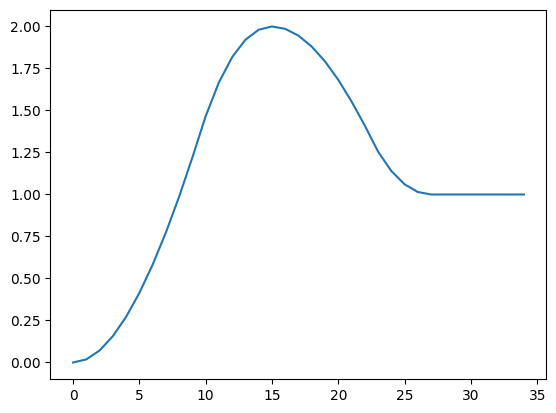

In [15]:
plt.plot(x, fit)

In [16]:
# step 1
list_tau = np.linspace(5, 40, 5)
list_T0 = np.linspace(-15, 10, 5)
list_t1 = np.linspace(10, 20, 5)
list_x1 = np.linspace(-5, 5, 5)

# step 2
list_t2 = np.linspace(10, 20, 5)
list_tr = np.linspace(0, 15, 5)
list_x_0 = np.linspace(-0.1, 0.1, 5)
list_x2 = np.linspace(-5, 5, 5)


In [17]:
param = dict(x=x,
             T0=T0, t1=t1, t2=t2, tr=tr,
             x_0=x_0, x1=x1, x2=x2,
             tau=tau)


def generat_data(do_whitening=False) :
    
    data = []
    
    for var, liste in zip(['tau', 'T0', 't1', 'x1', 't2', 'tr', 'x_0', 'x2'],
                          [list_tau, list_T0, list_t1, list_x1, list_t2, list_tr, list_x_0, list_x2]):
        
        for a in range(len(liste)) :
            new_param = param.copy()
            new_param[var] = liste[a]
            new_param['do_whitening']=do_whitening
            data.append(dict(visible=False, line=dict(color='black', width=2),
                             x=x, y=list(ANEMO.Model.saccade(**new_param))))
    
   
    return data

In [18]:
data_false = generat_data(do_whitening=False)
#data_true = generat_data(do_whitening=True)

In [19]:
sliders=[]
d, t = 0, 0

for var, liste in zip(['tau', 'T0', 't1', 'x1', 't2', 'tr', 'x_0', 'x2'],
                      [list_tau, list_T0, list_t1, list_x1, list_t2, list_tr, list_x_0, list_x2]):
    
    dic = []
    for a in range(len(liste)) :
        if var=='x_0' :
            di = dict(method = 'restyle', args = ['visible', [False] * len(data_false)],
                      label='%0.2f'%(liste[a]))
        else :
            di = dict(method = 'restyle', args = ['visible', [False] * len(data_false)],
                         label = str(int(liste[a])))
        di['args'][1][d] = True
        dic.append(di)
        d=d+1
    
    '''if var == 'tau' :
        pre = "<b>Step 1:</b> <br> %s: "%var
    
    elif var == 't2' :
        t=t+35
        pre = "<b>Step 2:</b> <br> %s: "%var
    else :
        pre = "%s: "%var'''
    
    pre = "<b>%s :</b> "%var
    sliders.append(dict(x=-0.7, y=1.1, ticklen=0, font=dict(size=1),
                        active = len(liste),
                        currentvalue = {"prefix": pre, 'font':{'size':13}},
                        pad = {"t": t-10, 'b': 1}, len=0.4, steps = dic,
                        bgcolor='#BABABA', bordercolor='#BABABA', borderwidth=0))
    
    #if var in ['latency', 'start_anti'] :
    #    t=t+10

    t=t+50 #65

layout = go.Layout(title=dict(text="Model Saccade",
                                  font={'color':'#4D4D4D', 'size':20},
                                  xanchor='center',
                                  xref='paper'),
                       xaxis=dict(title='Time (ms)', range=[-10, 50], tickfont={'size':10}),
                       yaxis=dict(title='Position (°)',range=[-6, 6], tickfont={'size':10}),
                       font=dict( family="Open Sans, monospace", size=15, color="black"),
                       sliders=sliders, 
                       showlegend=False, plot_bgcolor='#E6E6E6')
                


data = data_false #+ data_true

config = {'showLink':False,
          'displaylogo':False,
         'modeBarButtonsToRemove':['zoom2d', 'pan2d', 'toImage',
                                   'toggleSpikelines','hoverClosestCartesian',
                                   'hoverCompareCartesian', 'sendDataToCloud']}

fig = go.Figure(data=data, layout=layout)
iplot(fig, config=config)
plot(fig, filename='model_saccade.html', auto_open=False, config=config)

'model_saccade.html'